# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [34]:
# student 1: REMEZ 1950
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

In [36]:
#LOAD TRAIN DATA
train_data = pd.read_csv('titanic_train.csv')

In [37]:
#LOAD TEST DATA
test_data = pd.read_csv('titanic_test.csv')

In [38]:
print("\nTrain Data Statistics:")
print(train_data.describe())


Train Data Statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1

In [39]:
print("\nTest Data Statistics:")
print(test_data.describe())


Test Data Statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  179.000000  179.000000  179.000000  179.000000  179.000000  179.000000   
mean     2.363128    0.675978   30.366983    0.502793    0.368715   31.507239   
std      0.812116    0.469321   12.246691    1.278053    0.819923   49.254330   
min      1.000000    0.000000    0.420000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000   24.000000    0.000000    0.000000    7.895800   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   12.000000   
75%      3.000000    1.000000   36.000000    1.000000    0.000000   27.825000   
max      3.000000    1.000000   71.000000    8.000000    5.000000  263.000000   

         Embarked    Survived  
count  179.000000  179.000000  
mean     0.351955    0.340782  
std      0.639640    0.475302  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.

In [40]:
#TRAIN FIRST 5 ROWS
print("Train Data - First 5 rows:")
print(train_data.head())

Train Data - First 5 rows:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0


In [41]:
#TEST FIRST 5 ROWS
print("\nTest Data - First 5 rows:")
print(test_data.head())


Test Data - First 5 rows:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


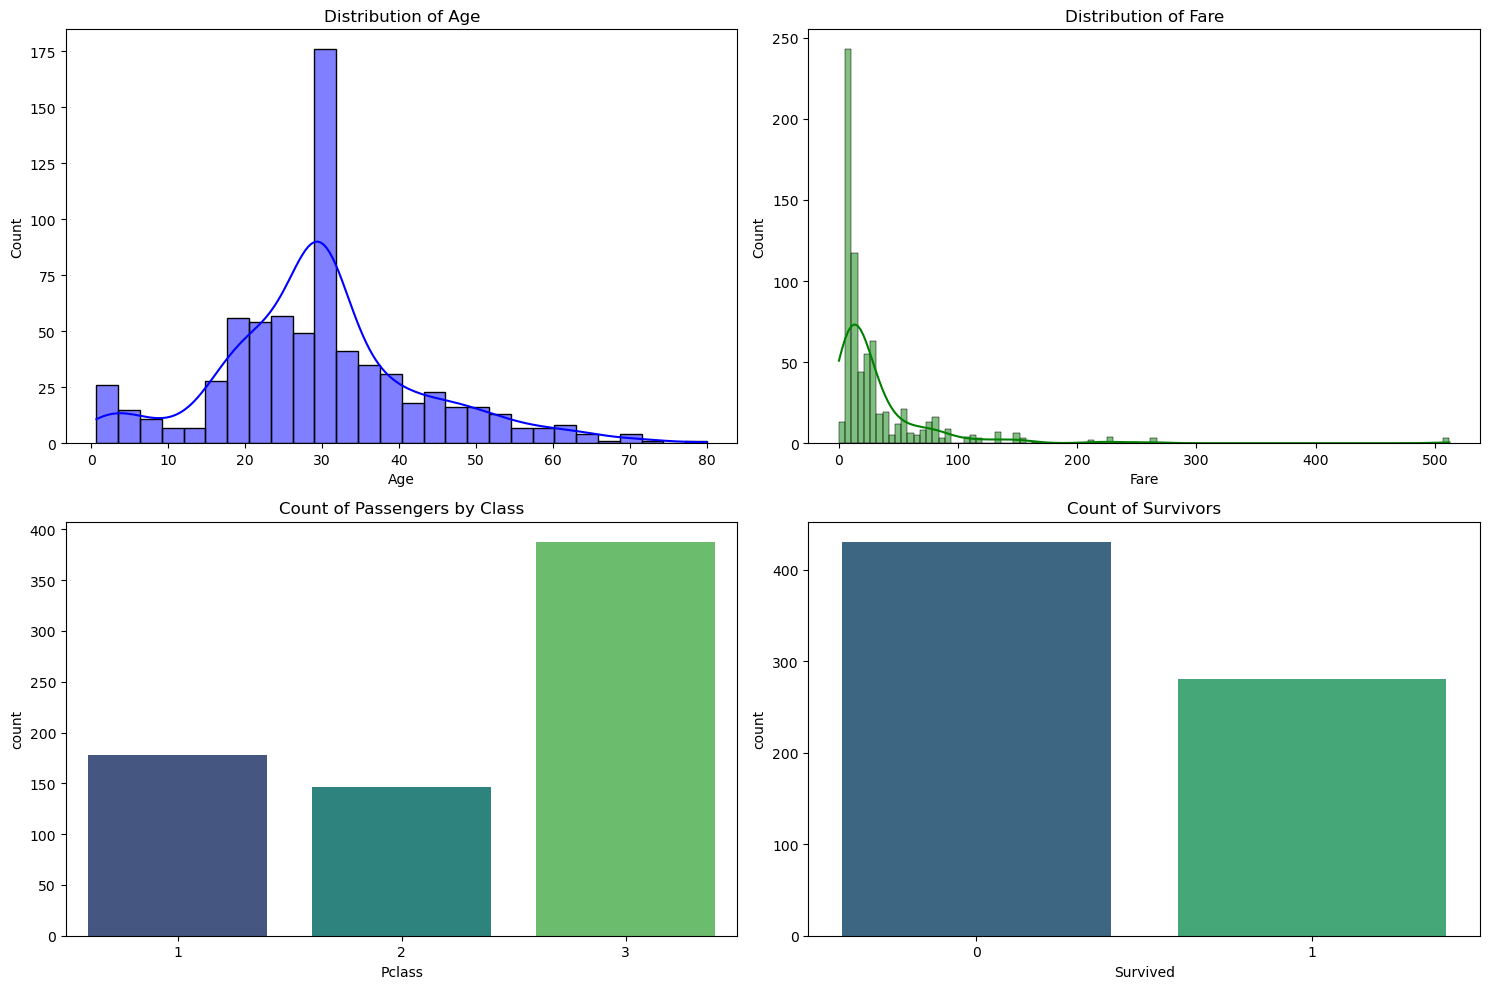

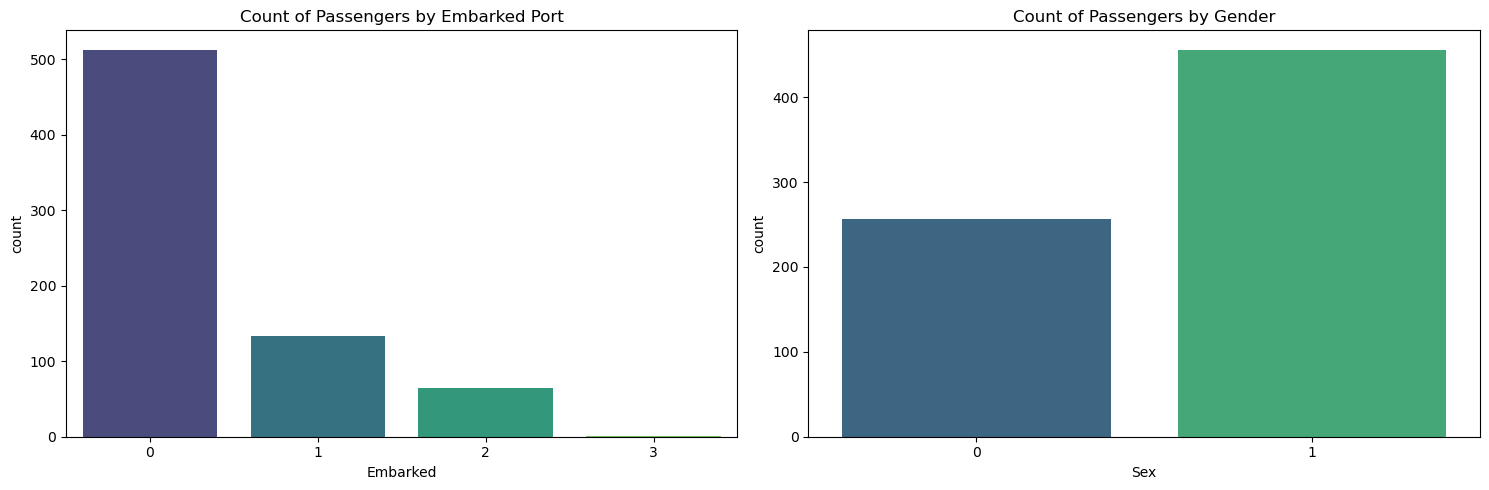

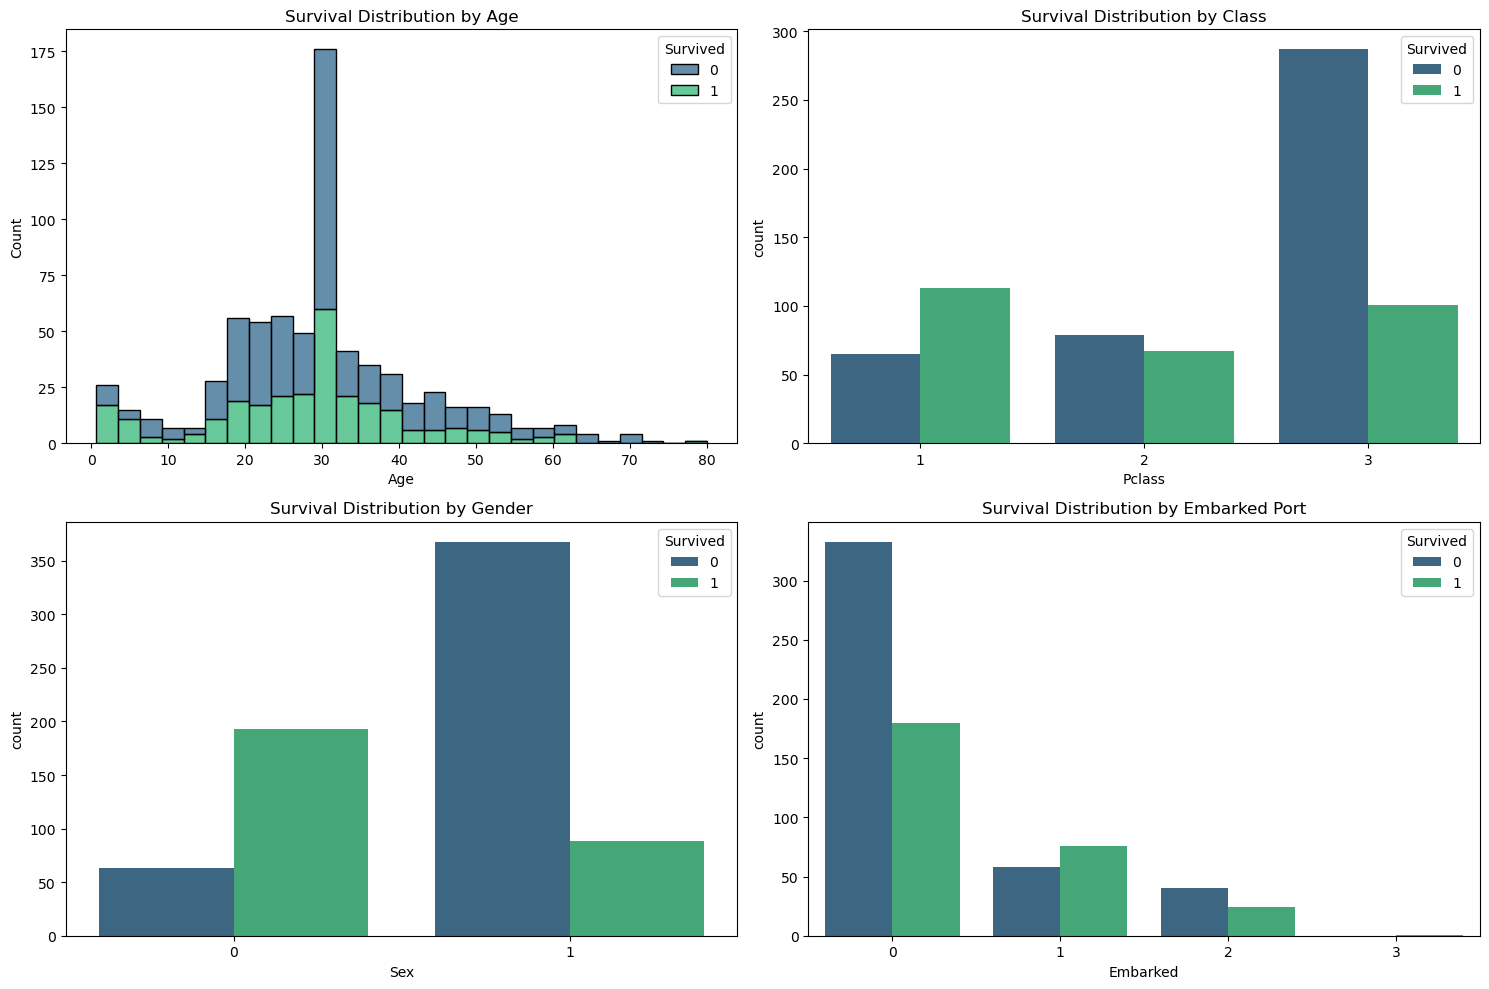

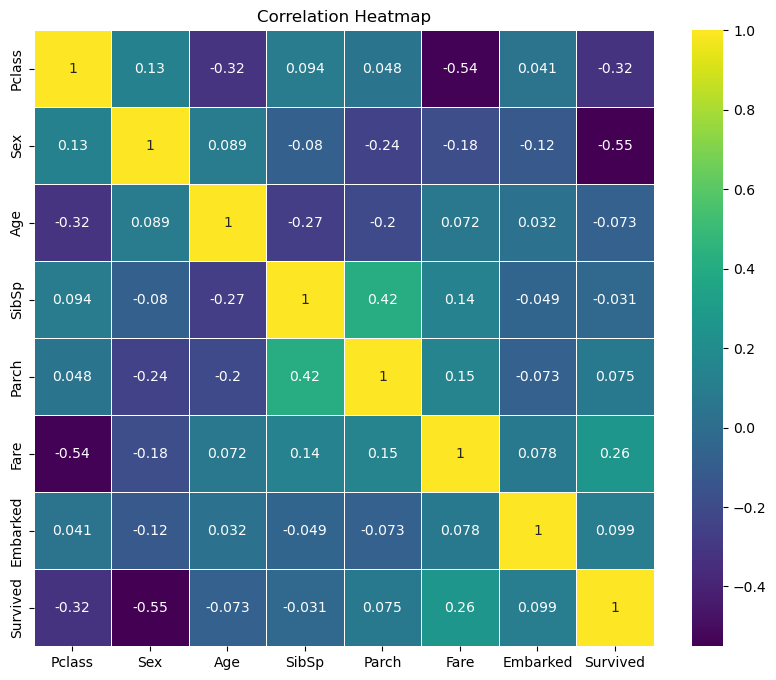

In [42]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(train_data['Age'].dropna(), kde=True, color='blue')
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(train_data['Fare'], kde=True, color='green')
plt.title('Distribution of Fare')

plt.subplot(2, 2, 3)
sns.countplot(x='Pclass', data=train_data, palette='viridis')
plt.title('Count of Passengers by Class')

plt.subplot(2, 2, 4)
sns.countplot(x='Survived', data=train_data, palette='viridis')
plt.title('Count of Survivors')

plt.tight_layout()
plt.show()

# Categorical features analysis
plt.figure(figsize=(15, 5))

# Countplot of passengers by Embarked
plt.subplot(1, 2, 1)
sns.countplot(x='Embarked', data=train_data, palette='viridis')
plt.title('Count of Passengers by Embarked Port')

# Countplot of passengers by Sex
plt.subplot(1, 2, 2)
sns.countplot(x='Sex', data=train_data, palette='viridis')
plt.title('Count of Passengers by Gender')

plt.tight_layout()
plt.show()

# Survival analysis based on different features
plt.figure(figsize=(15, 10))

# Survival rate by Age
plt.subplot(2, 2, 1)
sns.histplot(data=train_data, x='Age', hue='Survived', multiple='stack', palette='viridis')
plt.title('Survival Distribution by Age')

# Survival rate by Pclass
plt.subplot(2, 2, 2)
sns.countplot(data=train_data, x='Pclass', hue='Survived', palette='viridis')
plt.title('Survival Distribution by Class')

# Survival rate by Sex
plt.subplot(2, 2, 3)
sns.countplot(data=train_data, x='Sex', hue='Survived', palette='viridis')
plt.title('Survival Distribution by Gender')

# Survival rate by Embarked
plt.subplot(2, 2, 4)
sns.countplot(data=train_data, x='Embarked', hue='Survived', palette='viridis')
plt.title('Survival Distribution by Embarked Port')

plt.tight_layout()
plt.show()

#Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [43]:
X_train = train_data.drop('Survived', axis=1)
y_train = train_data['Survived']
X_test = test_data.drop('Survived', axis=1)
y_test = test_data['Survived']

num_features = ['Age', 'Fare', 'SibSp', 'Parch']
cat_features = ['Pclass', 'Sex', 'Embarked']

X_train['FamilySize'] = X_train['SibSp'] + X_train['Parch'] + 1
X_test['FamilySize'] = X_test['SibSp'] + X_test['Parch'] + 1

num_features.append('FamilySize')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), num_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), cat_features)
    ])

X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

scaler = StandardScaler()
X_train_transformed[:, :len(num_features)] = scaler.fit_transform(X_train_transformed[:, :len(num_features)])
X_test_transformed[:, :len(num_features)] = scaler.transform(X_test_transformed[:, :len(num_features)])

# GridSearch
models = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [5, 10],
            'min_samples_split': [2, 5]
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto']
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    }
}

# Perform GridSearchCV for each model and collect the results
results = []
for model_name, config in models.items():
    grid = GridSearchCV(config['model'], config['params'], cv=5, scoring='f1_macro', n_jobs=-1)
    grid.fit(X_train_transformed, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_transformed)
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        'Model': model_name,
        'Best Parameters': grid.best_params_,
        'F1 Score': f1,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, y_pred)
    })

# Create a DataFrame to summarize the results
results_df = pd.DataFrame(results)

# Display the summary table
print(results_df)

for result in results:
    print(f"Model: {result['Model']}")
    print(result['Classification Report'])
    print("=" * 80)


                Model                                    Best Parameters  \
0        RandomForest  {'max_depth': 5, 'min_samples_split': 2, 'n_es...   
1                 SVM                         {'C': 1, 'gamma': 'scale'}   
2  LogisticRegression                      {'C': 0.1, 'solver': 'lbfgs'}   
3                 KNN           {'n_neighbors': 7, 'weights': 'uniform'}   

   F1 Score  Accuracy                              Classification Report  
0  0.795953  0.821229                precision    recall  f1-score   ...  
1  0.817482  0.837989                precision    recall  f1-score   ...  
2  0.772458  0.798883                precision    recall  f1-score   ...  
3  0.788622  0.810056                precision    recall  f1-score   ...  
Model: RandomForest
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       118
           1       0.76      0.69      0.72        61

    accuracy                           0.82       179
   mac

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [44]:
# Choose the best model from part 3
best_model_name = "SVM"
best_model = None

if best_model_name == "RandomForest":
    best_model = RandomForestClassifier(max_depth=5, min_samples_split=2, n_estimators=100, random_state=42)
elif best_model_name == "SVM":
    best_model = SVC(C=1, gamma='scale', random_state=42)
elif best_model_name == "LogisticRegression":
    best_model = LogisticRegression(C=0.1, solver='lbfgs', random_state=42)
elif best_model_name == "KNN":
    best_model = KNeighborsClassifier(n_neighbors=7, weights='uniform')

best_model.fit(X_train_transformed, y_train)

y_pred = best_model.predict(X_test_transformed)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')

first_5_predictions = y_pred[:5]

classification_rep = classification_report(y_test, y_pred)

# Display the results
print(f"Best Model: {best_model_name}")
print(f"Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("First 5 Predictions:", first_5_predictions)
print("Classification Report:\n", classification_rep)


Best Model: SVM
Accuracy: 0.84
F1 Score: 0.82
First 5 Predictions: [0 0 0 1 0]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       118
           1       0.78      0.74      0.76        61

    accuracy                           0.84       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179



## Part 5 - Apply on test and show model performance estimation

In [45]:
y_test_predictions = best_model.predict(X_test_transformed)

test_accuracy = accuracy_score(y_test, y_test_predictions)
test_f1_score = f1_score(y_test, y_test_predictions, average='macro')

first_5_predictions = y_test_predictions[:5]
first_5_actuals = y_test[:5].values

test_classification_report = classification_report(y_test, y_test_predictions)

# results
print("Test Set Results")
print("================")
print(f"Accuracy on Test Set: {test_accuracy:.2f}")
print(f"F1 Score on Test Set: {test_f1_score:.2f}")
print("First 5 Predictions vs Actual Values:")
for i, (pred, actual) in enumerate(zip(first_5_predictions, first_5_actuals)):
    print(f"Sample {i+1}: Predicted: {pred}, Actual: {actual}")
print("\nClassification Report:\n", test_classification_report)


Test Set Results
Accuracy on Test Set: 0.84
F1 Score on Test Set: 0.82
First 5 Predictions vs Actual Values:
Sample 1: Predicted: 0, Actual: 0
Sample 2: Predicted: 0, Actual: 0
Sample 3: Predicted: 0, Actual: 0
Sample 4: Predicted: 1, Actual: 0
Sample 5: Predicted: 0, Actual: 1

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       118
           1       0.78      0.74      0.76        61

    accuracy                           0.84       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.84      0.84      0.84       179

